# Prédiction de Salaires - Régression Linéaire Multiple

## Objectif
Ce notebook présente une analyse complète de régression linéaire multiple pour prédire les salaires des employés.

## Plan d'analyse
1. **Exploration des données**
2. **Préparation des données**
3. **Modélisation**
   - Baseline avec DummyRegressor
   - Régression linéaire simple
4. **Réugularisation avec GridSearchCV**
   - Ridge Regression (L2)
   - Lasso Regression (L1)
6. **Résumé et Comparaison Finale**

In [1]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## 1. Chargement et Exploration des Données

In [13]:
# Chargement des données

# TO DO : Charger le dataset employee_salaries.csv dans un DataFrame pandas et afficher les 5 premières lignes ainsi que la shape du dataset

import pandas as pd

data = pd.read_csv('data/employee_salaries.csv')

data.head()



,age,experience,education_years,heures_semaine,nb_projets,evaluation_performance,anciennete_entreprise,niveau_education,departement,poste,ville,secteur,taille_entreprise,salaire_annuel
0,38,5,0,39,3.0,2.9,2,Bac,Marketing,Senior,Paris,Services,Grande Entreprise,95600.0
1,29,0,1,35,1.0,4.6,0,Bac,Finance,Junior,Paris,Services,ETI,41500.0
2,25,1,0,37,0.0,4.4,0,Bac,R&D,Junior,Autres,Santé,Grande Entreprise,44300.0
3,25,1,4,40,3.0,7.4,0,Master,Ventes,Junior,Toulouse,Services,ETI,57100.0
4,37,5,1,41,7.0,5.0,0,Bac,IT,Senior,Paris,Tech,ETI,128000.0


In [20]:
# Informations sur le dataset et statistiques descriptives

# TO DO : Afficher les informations statistiques sur le dataset ainsi que le nombre de valeurs manquantes par colonne

data.isnull().sum()

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   experience              10000 non-null  int64  
 2   education_years         10000 non-null  int64  
 3   heures_semaine          10000 non-null  int64  
 4   nb_projets              9900 non-null   float64
 5   evaluation_performance  9800 non-null   float64
 6   anciennete_entreprise   10000 non-null  int64  
 7   niveau_education        10000 non-null  object 
 8   departement             10000 non-null  object 
 9   poste                   10000 non-null  object 
 10  ville                   10000 non-null  object 
 11  secteur                 10000 non-null  object 
 12  taille_entreprise       10000 non-null  object 
 13  salaire_annuel          10000 non-null  float64
dtypes: float64(3), int64(5), object(6)
memo

In [ ]:
# Séparation des variables numériques et catégorielles

# TO DO : créer deux listes qui séparent les variables numériques et catégorielles
import numpy as np

numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(numeric_features)
print(categorical_features)



['age', 'experience', 'education_years', 'heures_semaine', 'nb_projets', 'evaluation_performance', 'anciennete_entreprise', 'salaire_annuel']
['niveau_education', 'departement', 'poste', 'ville', 'secteur', 'taille_entreprise']


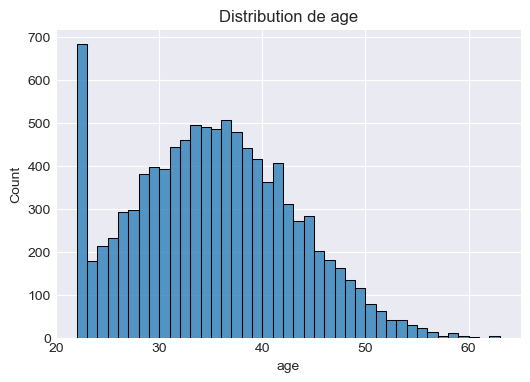

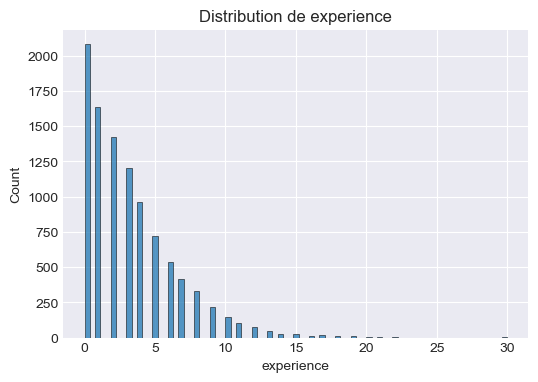

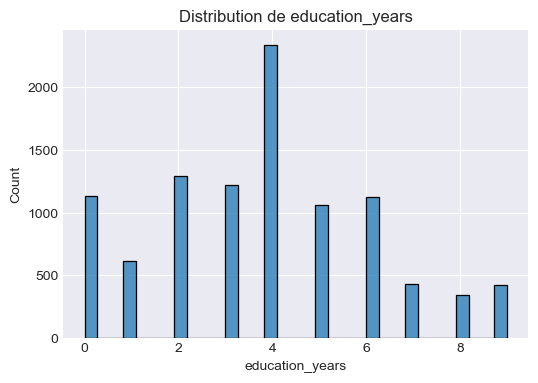

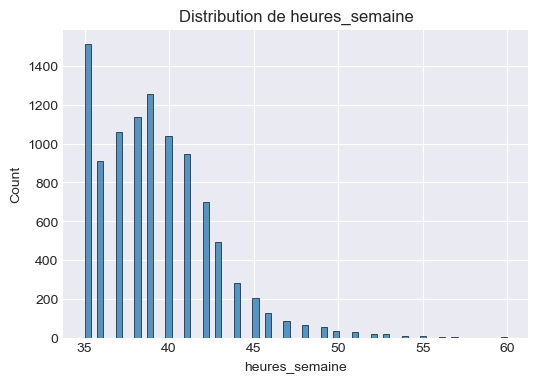

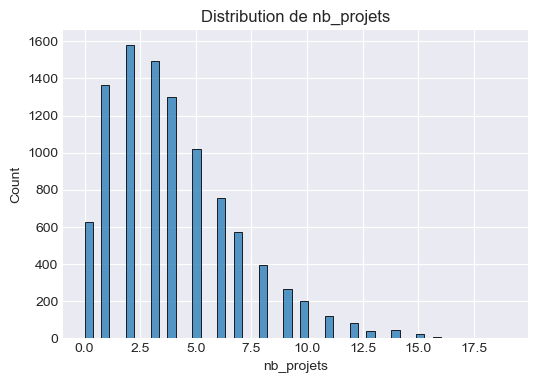

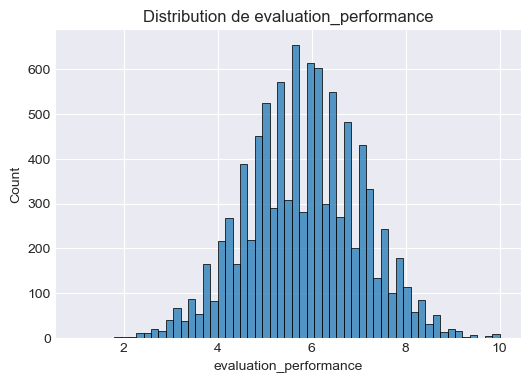

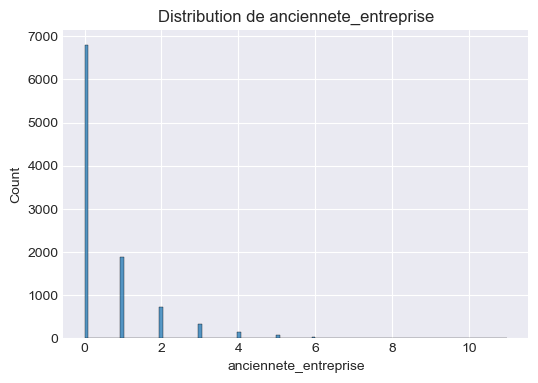

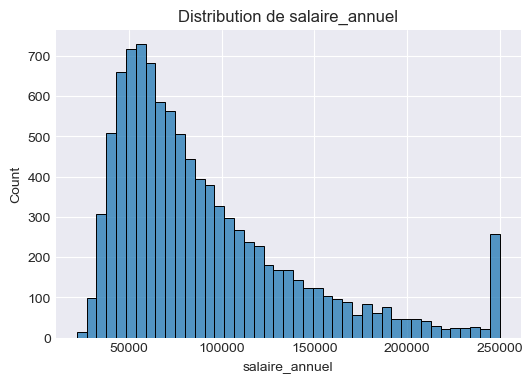

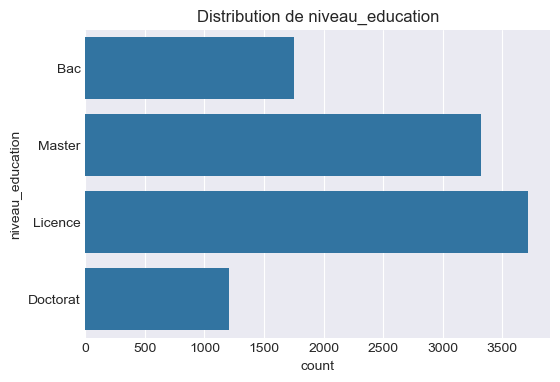

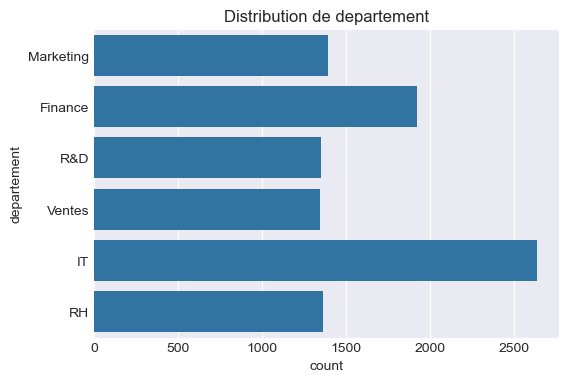

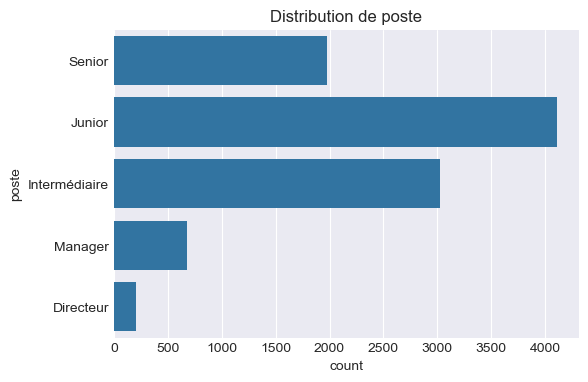

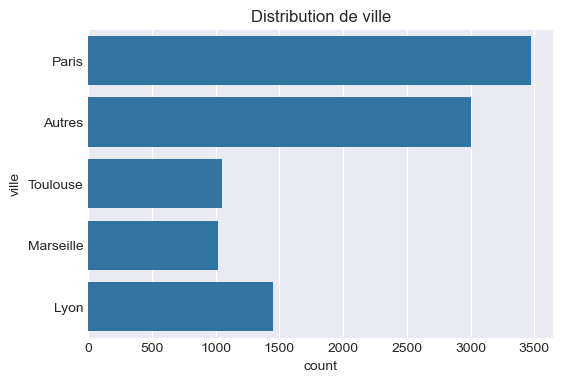

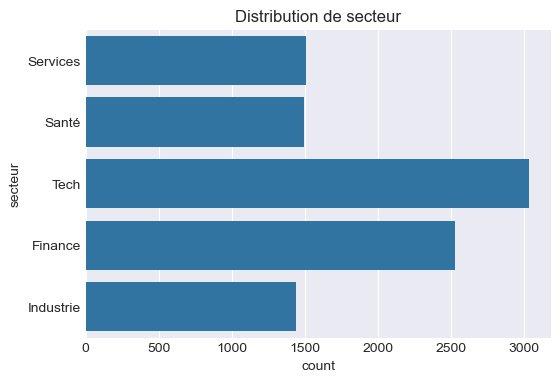

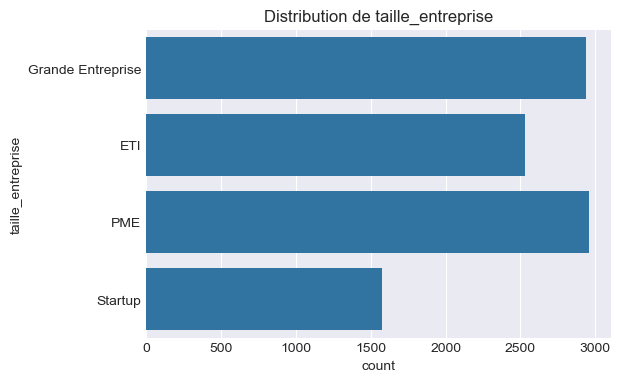

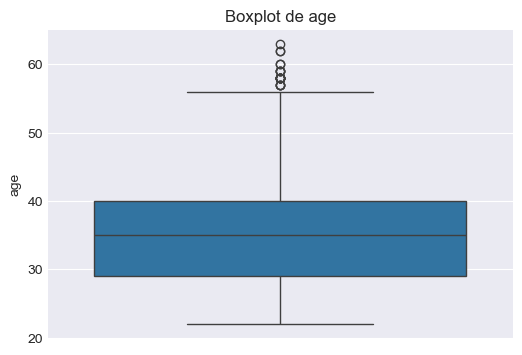

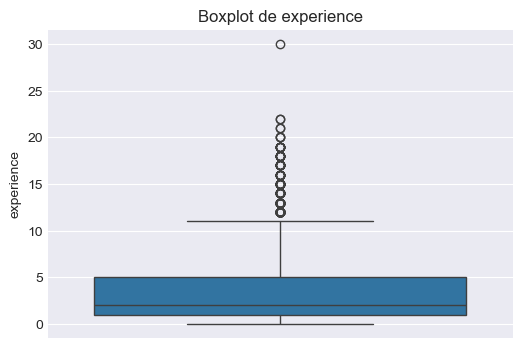

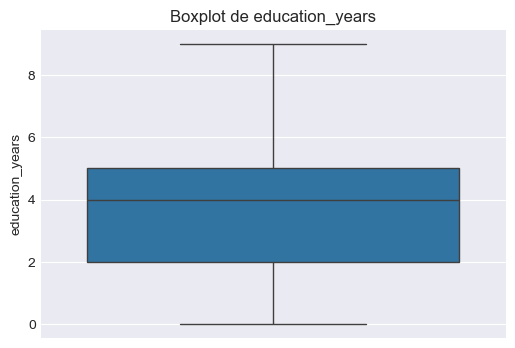

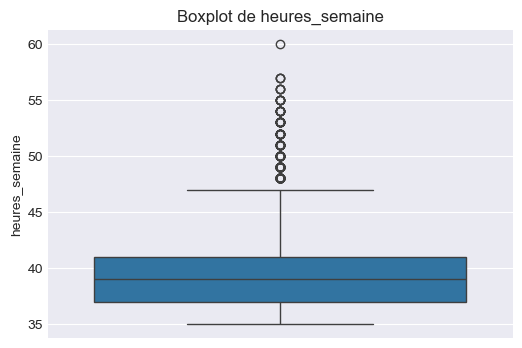

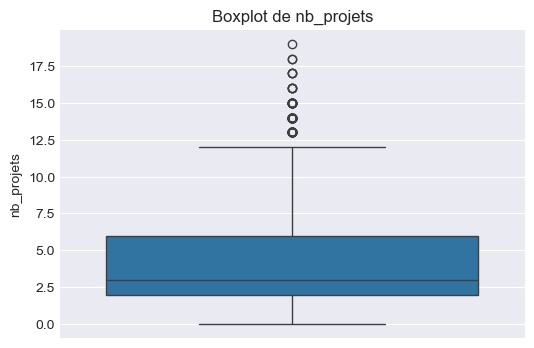

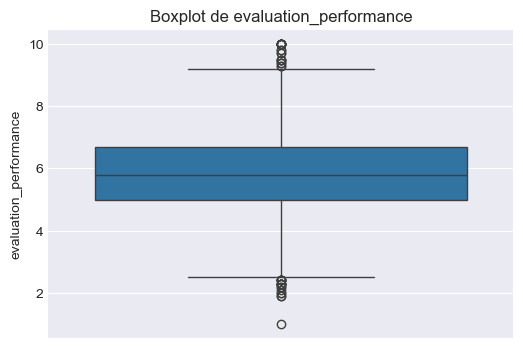

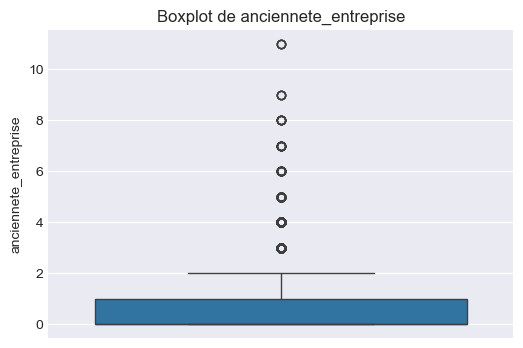

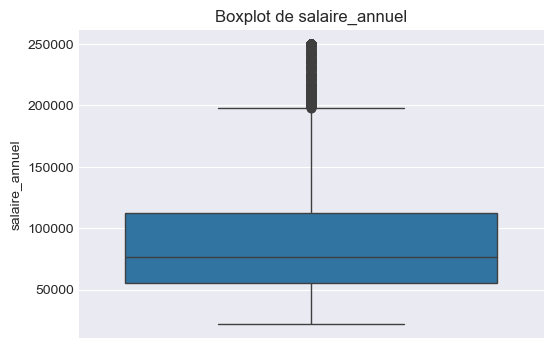

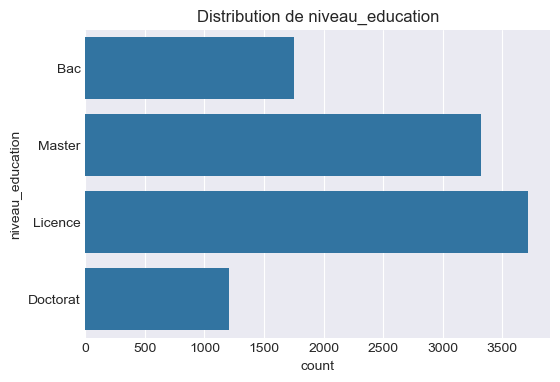

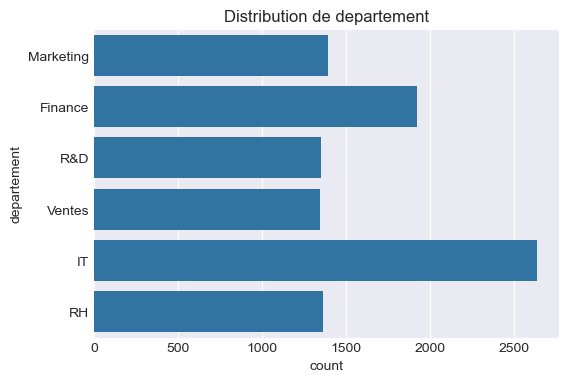

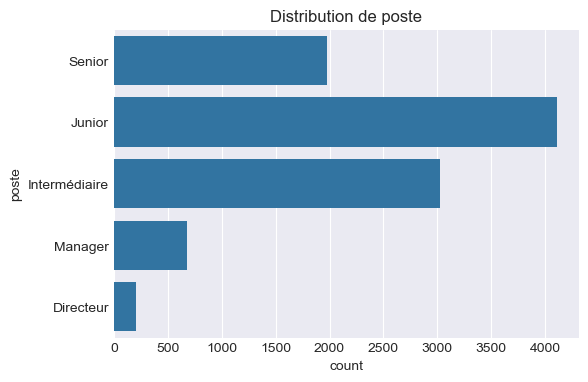

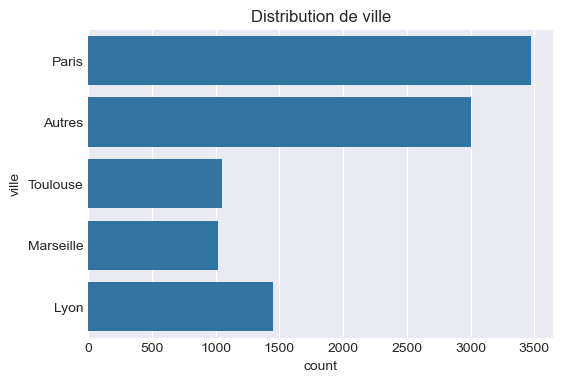

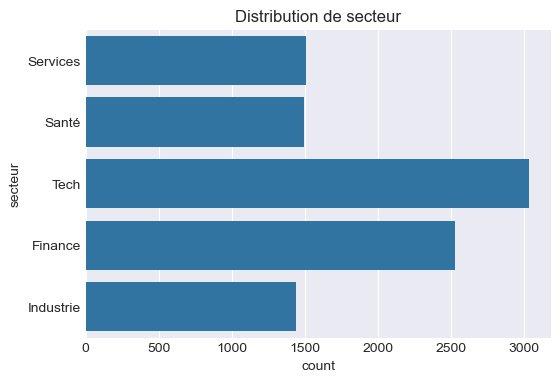

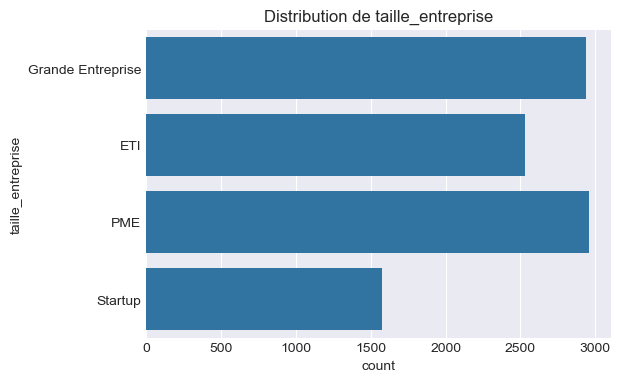

In [ ]:
# Analyse des données

# TO DO : Analyser les données avec des visualisations appropriées (histogrammes, boxplots, heatmap de corrélation, etc.) 
# pour comprendre la distribution des variables et leurs relations avec la variable cible 'salaire'

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col])
    plt.title(f'Distribution de {col}')
    plt.show()

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data[col])
    plt.title(f'Distribution de {col}')
    plt.show()

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data[col])
    plt.title(f'Boxplot de {col}')
    plt.show()




## 2. Préparation des Données

### 2.1 Séparation des features et de la cible

In [9]:
# Séparation des features (X) et de la cible (y)

# Séparer les données en dataset de features (X) et dataset de cible (y)

In [10]:
# Division en ensemble d'entraînement et de test (80/20)

# Spliter les données en ensembles d'entraînement et de test (80/20) et utiliser l'arribut random_state=42 

### 2.2 Preprocessing Pipeline

Nous allons créer un pipeline de preprocessing qui:
1. Impute les valeurs manquantes pour les variables numériques
2. Applique le scaling sur les variables numériques
3. Applique le one-hot encoding sur les variables catégorielles

In [18]:
# TO DO : implémenter des stratégie de prétraitement des données numériques et catégorielles en utilisant ColumnTransformer et Pipeline

## 3. Modélisation

### 3.1 Modèle de Base - DummyRegressor

In [11]:
# TO DO : Entrainer un modèle DummyRegressor, qui servira de baseline, et évaluer ses performances sur l'ensemble de test

### 3.2 Régression Linéaire Simple

In [ ]:
# TO DO : Entrainer un modèle de régression linaire

In [12]:
# TO DO : afficher les valeurs prédites par le modèle linéaire vs les valeurs réelles du dataset de test

In [16]:
# TO DO : afficher les valeurs des coefficients du modèle linéaire

## 4. Régularisation avec GridSearchCV

In [ ]:
# TO DO : Entrainer un modèle Ridge en testant les hyerparamètres suivants : 
#    - 'alpha': np.logspace(-3, 2, 20),
#    - 'selection': ['cyclic', 'random']
# Afficher les résultats de la cross validation et les performances sur l'ensemble de test 

In [17]:
# TO DO : Entrainer un modèle Ridge en testant les hyerparamètres suivants : 
#    - 'alpha': np.logspace(-3, 3, 20),
#    - 'solver': ['auto', 'svd', 'cholesky', 'lsqr']
# Afficher les résultats de la cross validation et les performances sur l'ensemble de test

## 5. Résumé et Comparaison Finale

In [19]:
# TO : Afficher pour chaque modèle (dummy, linéaire, ridge, lasso) les performances sur l'ensemble d'entrainement et de test et conclure
# sur le choix du modèle et sa capacité de généralisation